In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
##importing libs
import pandas as pd
import numpy as np
from scipy import stats
#Provides more utility functions for optimization, stats and signal processing.
from sklearn.metrics import mean_squared_error
#The primary objective of the MSE is to assess the quality of a model's predictions by measuring how closely they align with the ground truth.

import matplotlib.pyplot as plt
import seaborn as sns

#PreProcessing Data Libs
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
#When evaluating a model, a single train-test split is insufficient.
#Instead, we can test the model by splitting the data into pieces (k-fold cross-validation).
#cross_val_score splits the data into k pieces and uses a different piece as the test set each time.
#This allows us to more accurately measure the overall success of the model.

#GridSearchCV → Finds the best hyperparameters.

#C determines the regularization strength.
#If C increases → The model penalizes less (the risk of overfitting increases).
#If C decreases → The model penalizes more (it becomes simpler).

#train test datasets splitting for ML models
from sklearn.compose import make_column_transformer, ColumnTransformer
#Transforming the columns into other type of variables
from sklearn.pipeline import Pipeline , make_pipeline
#It manages all operations in a single flow.
#It combines preprocessing and model.It prevents data leakage. (It also applies preprocessing to test data.)It makes your code cleaner and more readable.
from sklearn.impute  import SimpleImputer
#filling the nan variables
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
#Ordinal Encoder: Converts ordinal categorical data to numerical values
#Standart Scaler: Used to scale numerical data.Transforms so that mean = 0, standard deviation = 1.
#OneHot Encoding: Converts category data to binary (0 and 1) format.Example: "Istanbul", "Ankara", "Izmir" → [1, 0, 0], [0, 1, 0], [0, 0, 1]

#Model Libs

from sklearn.linear_model import LinearRegression, Ridge , ElasticNet , Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge


In [3]:
train= pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test= pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")

## Data Exploration

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
cat_columns=train.select_dtypes(include = ['object'])

In [8]:
for col in cat_columns:
    print(f'{col} -> {train[col].unique()}')

MSZoning -> ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street -> ['Pave' 'Grvl']
Alley -> [nan 'Grvl' 'Pave']
LotShape -> ['Reg' 'IR1' 'IR2' 'IR3']
LandContour -> ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities -> ['AllPub' 'NoSeWa']
LotConfig -> ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope -> ['Gtl' 'Mod' 'Sev']
Neighborhood -> ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 -> ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 -> ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType -> ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle -> ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle -> ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl -> ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

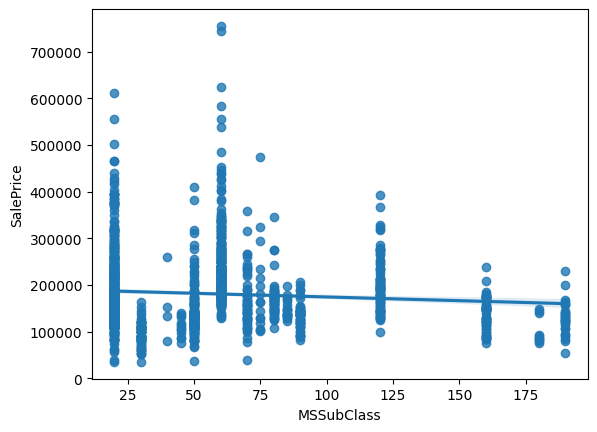

In [9]:
sns.regplot(data = train , x= 'MSSubClass', y = 'SalePrice')

<Axes: xlabel='LotArea', ylabel='SalePrice'>

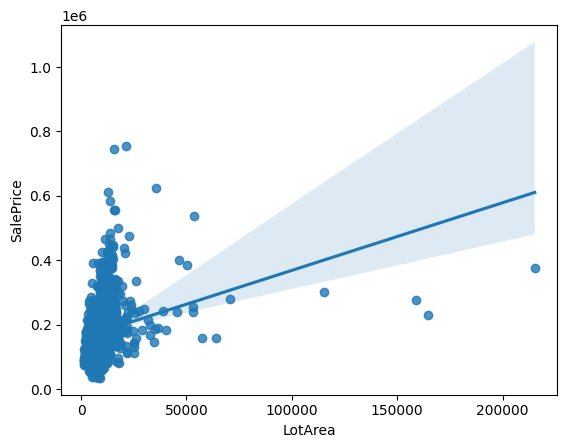

In [10]:
sns.regplot(data = train , x= 'LotArea', y = 'SalePrice')

In [11]:
train.query('LotArea > 55000')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [12]:
#This code displays the most extreme (highest or lowest) values ​​in the LotArea column. Typically, values ​​with very high Z-scores are likely to be observations that are outliers in the dataset.
stats.zscore(train['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

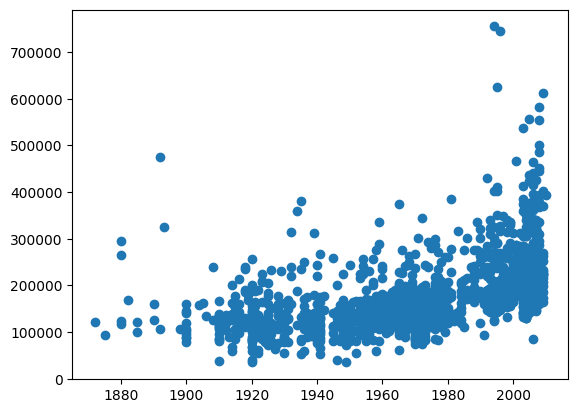

In [13]:
plt.scatter( x = 'YearBuilt', y = 'SalePrice' , data = train)

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

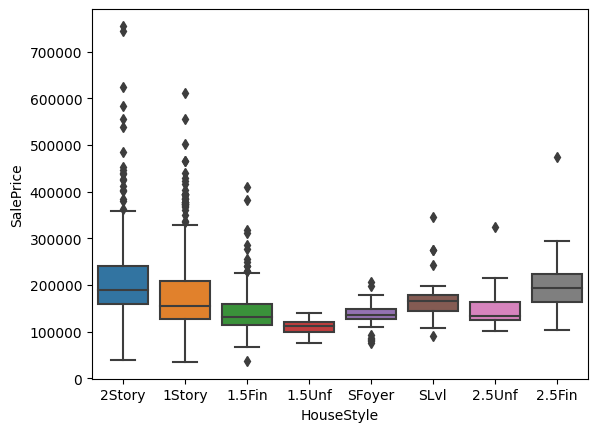

In [14]:
sns.boxplot(x = 'HouseStyle', y= 'SalePrice', data = train)

In [15]:
train[(train['HouseStyle'] == '2Story') & (train['SalePrice'] > 370000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
161,162,60,RL,110.0,13688,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,412500
231,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000
349,350,60,RL,56.0,20431,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,New,Partial,437154
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
477,478,60,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,380000
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
661,662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000


In [16]:
numeric_columns = train.select_dtypes(include = ['int64','float64'])

<ipython-input-17-5d8d400ae8da>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


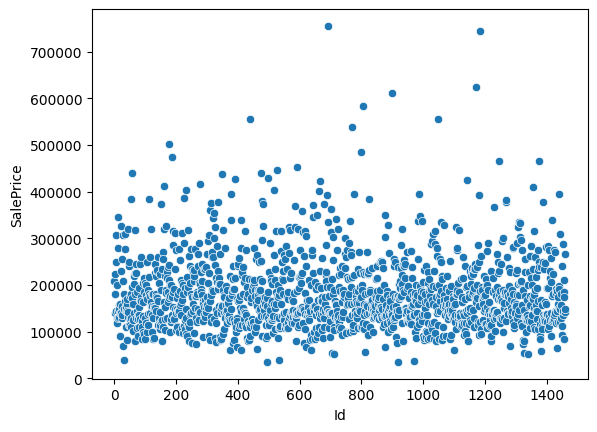

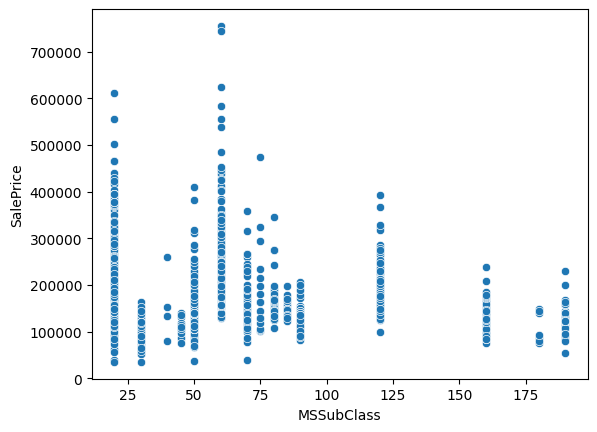

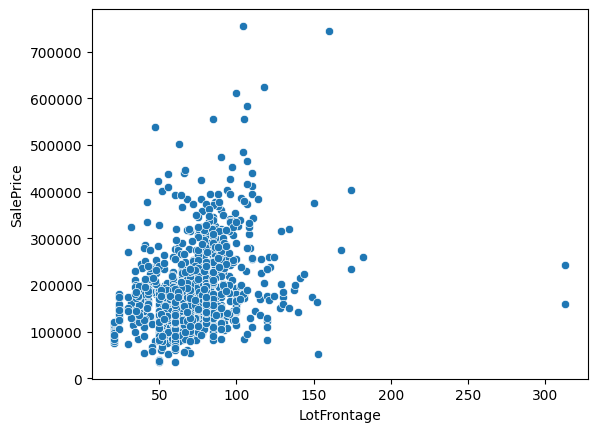

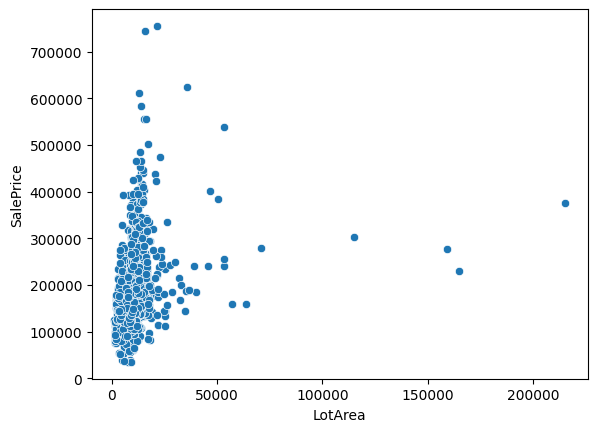

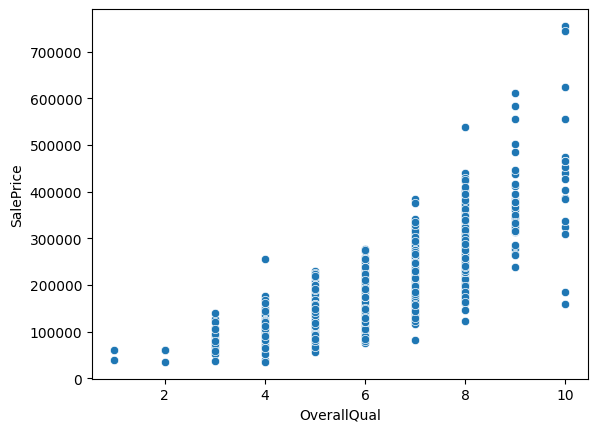

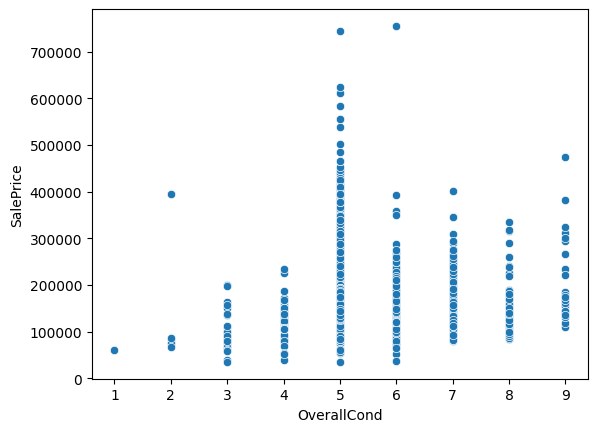

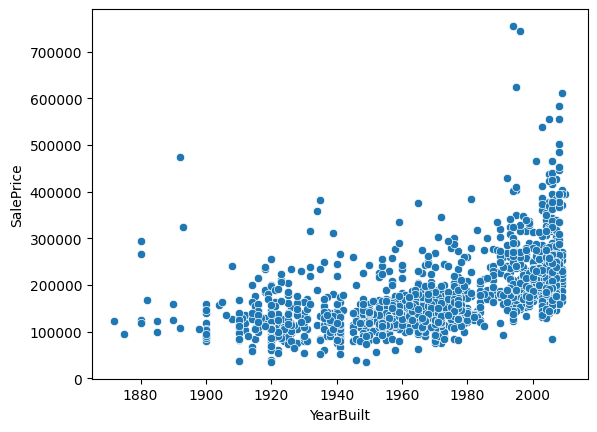

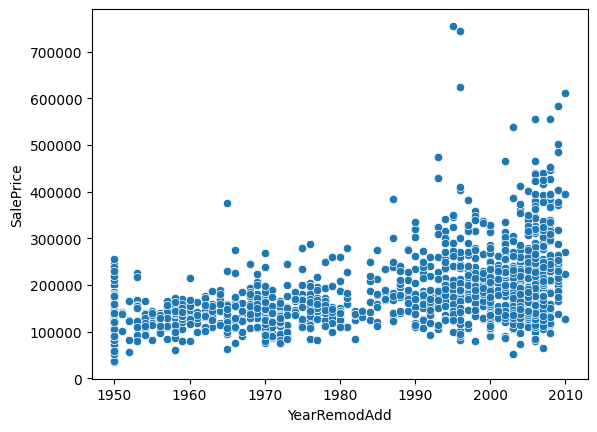

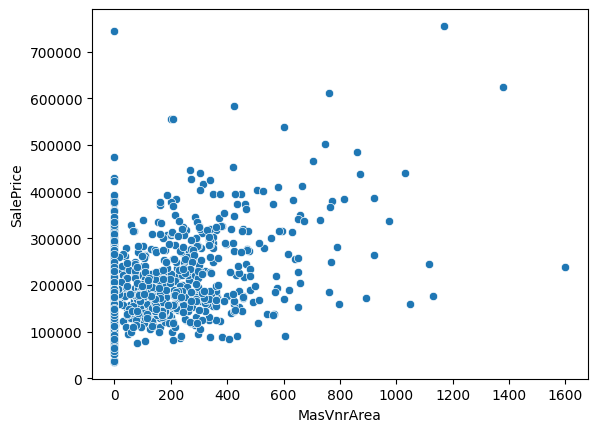

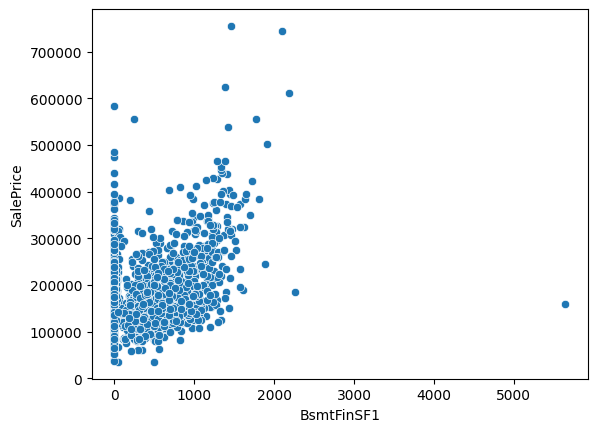

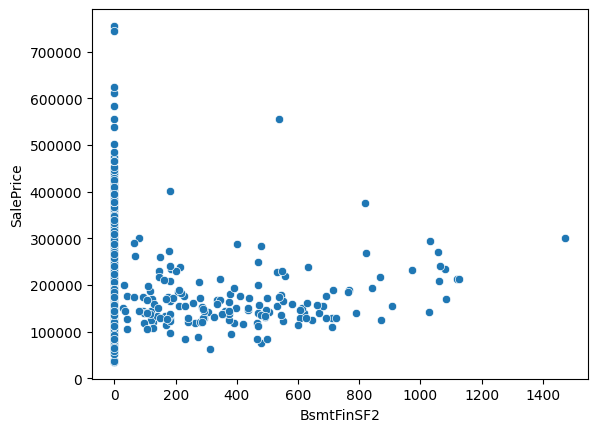

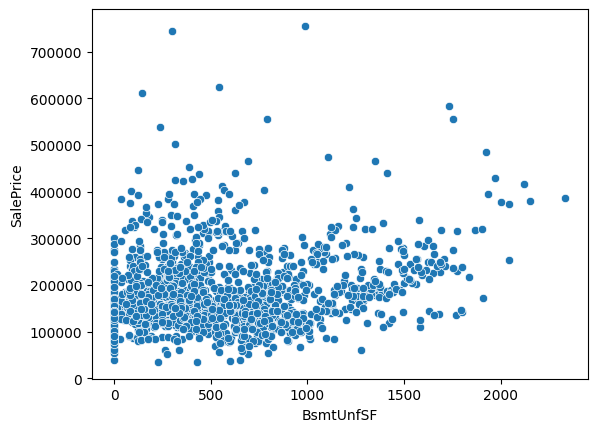

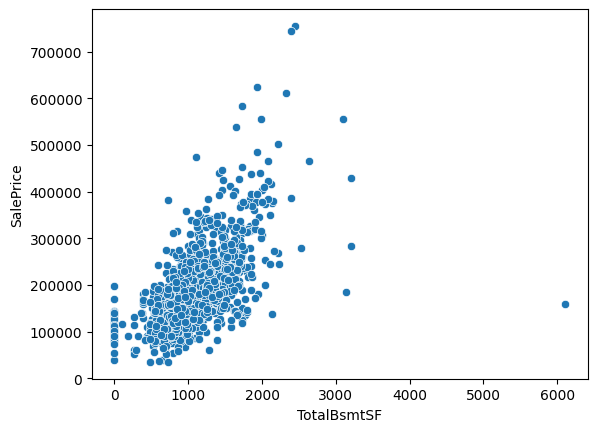

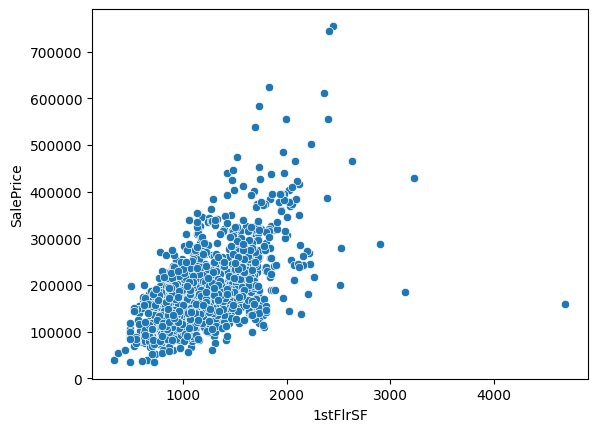

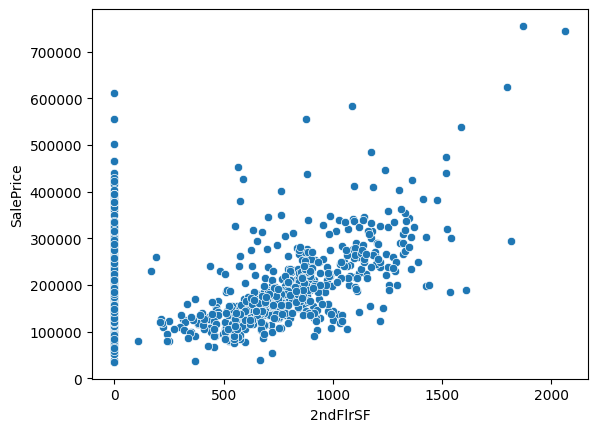

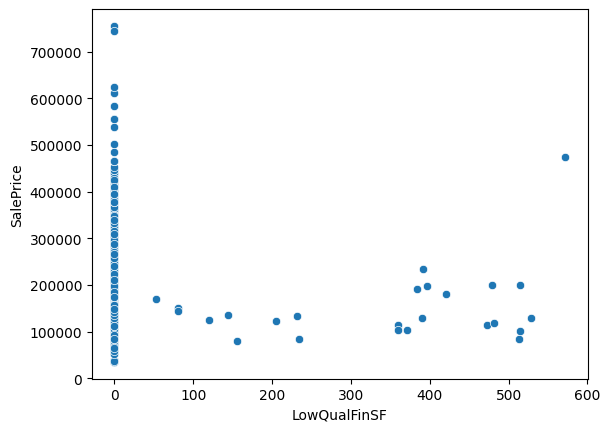

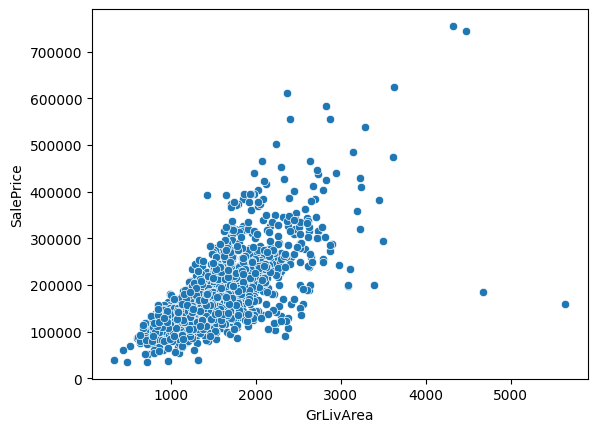

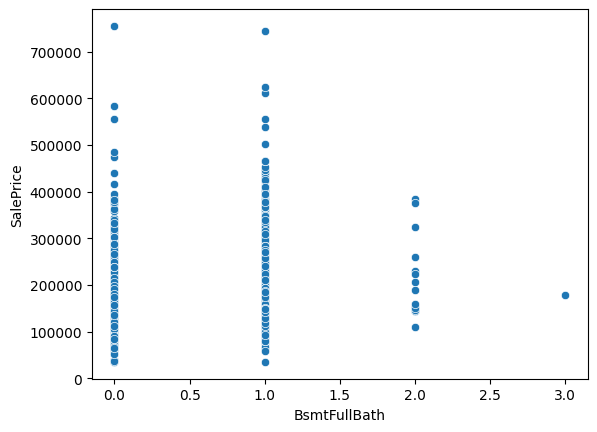

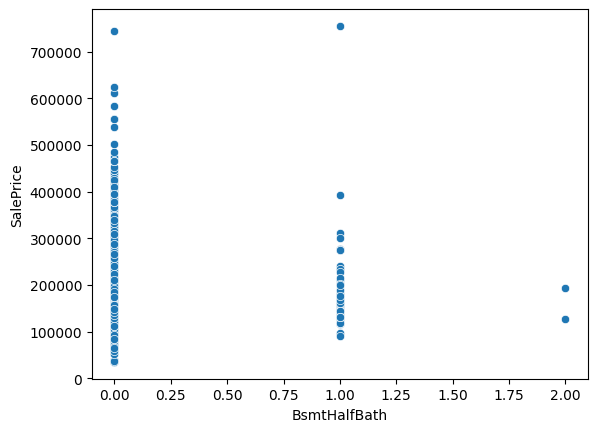

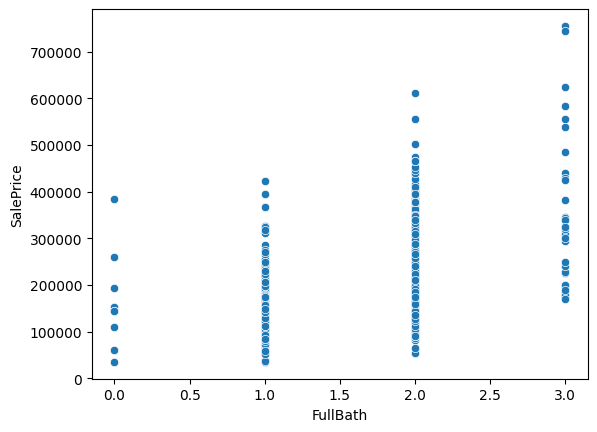

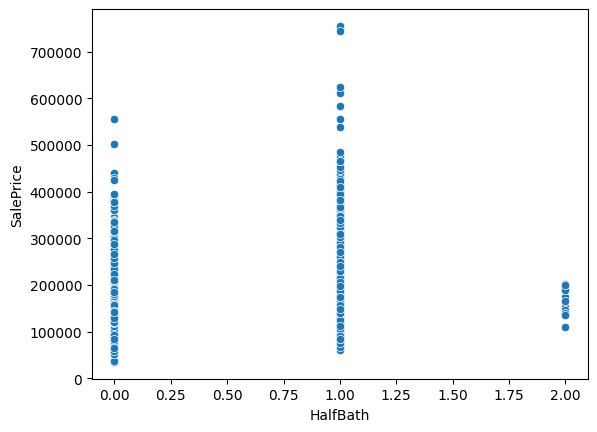

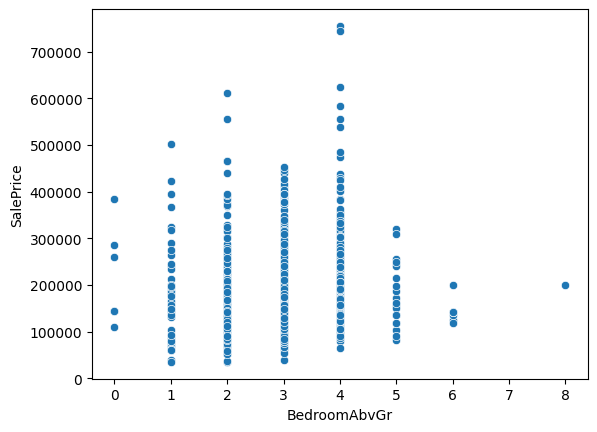

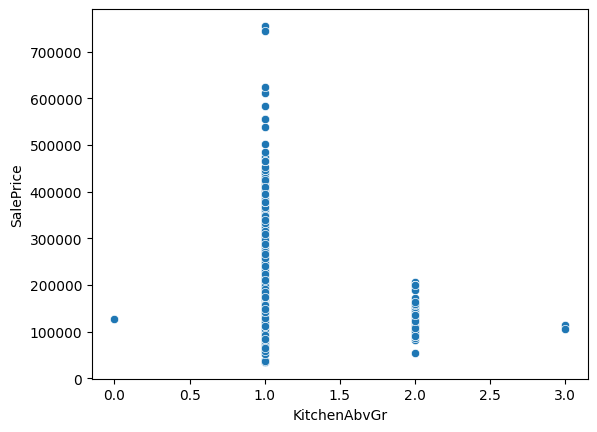

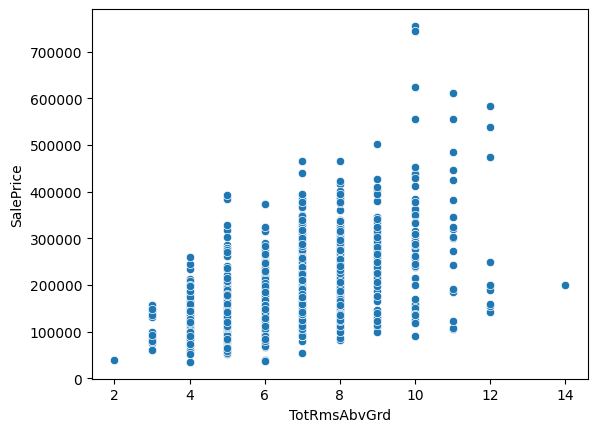

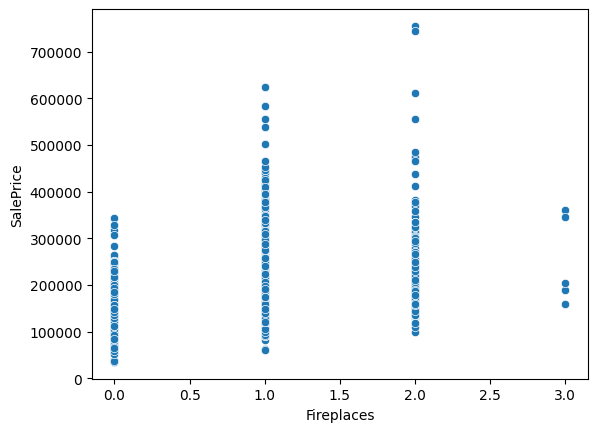

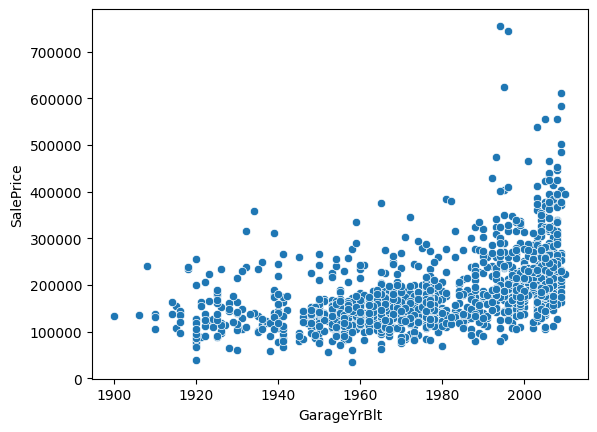

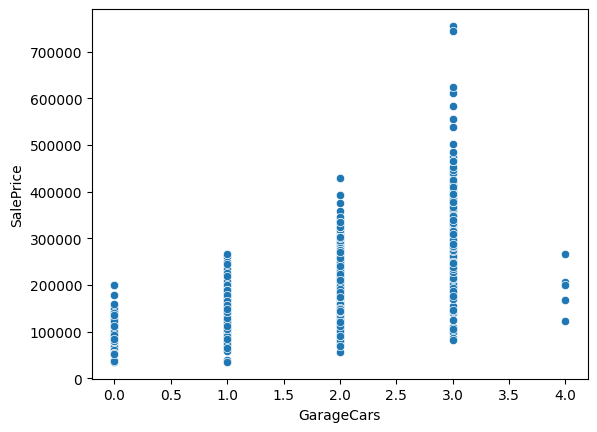

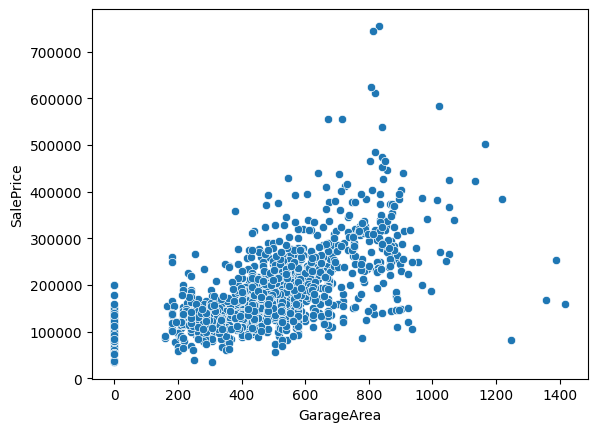

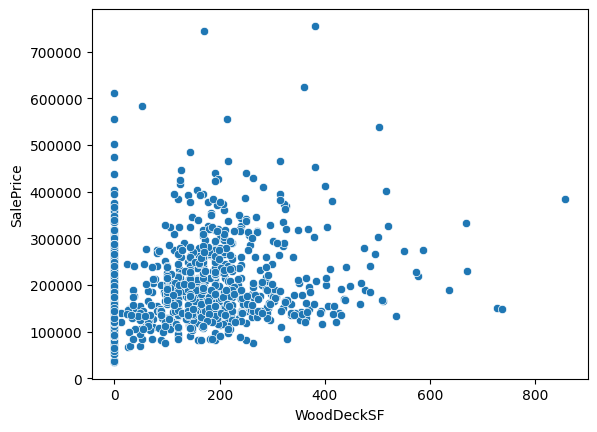

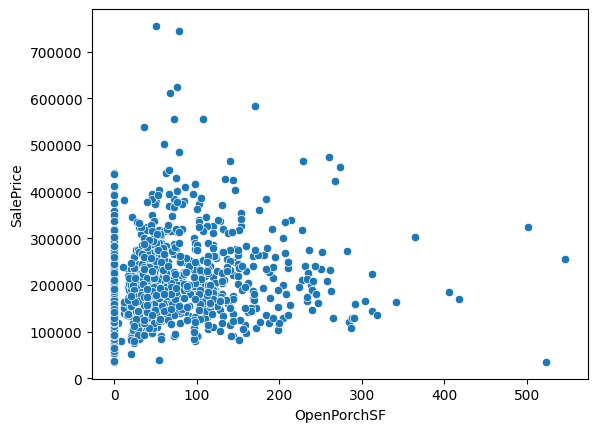

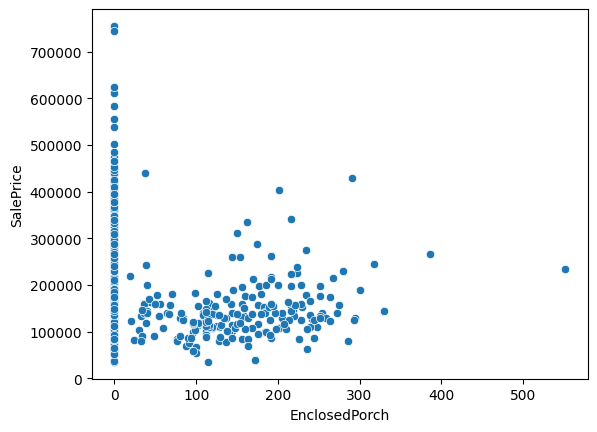

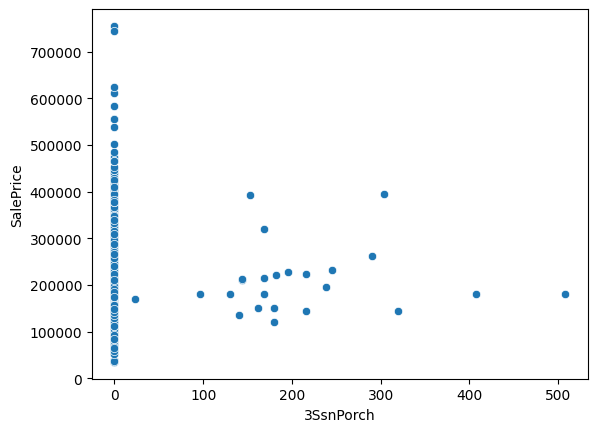

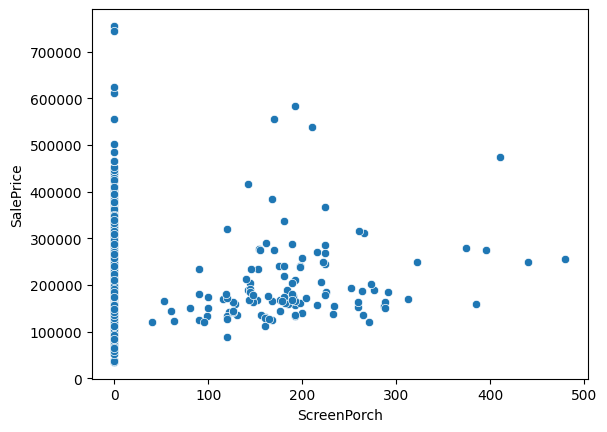

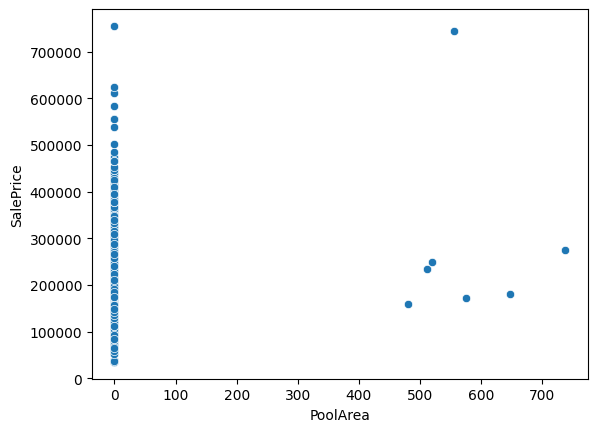

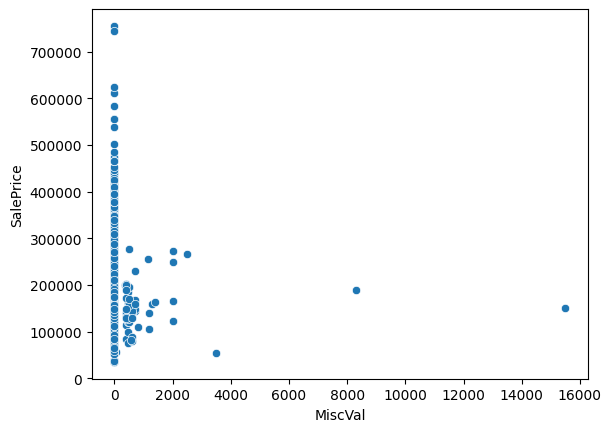

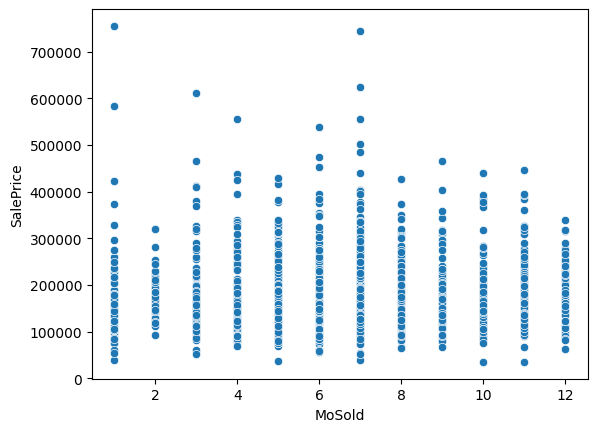

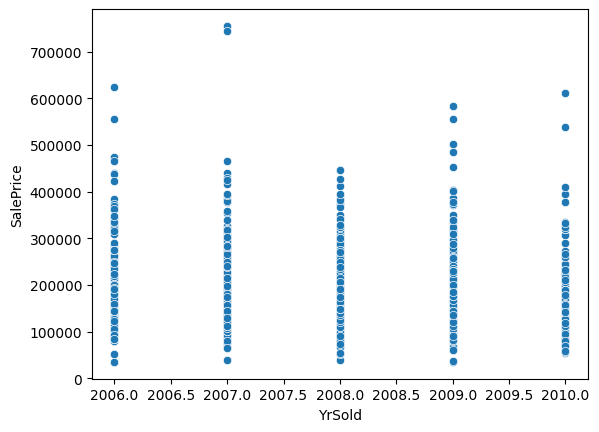

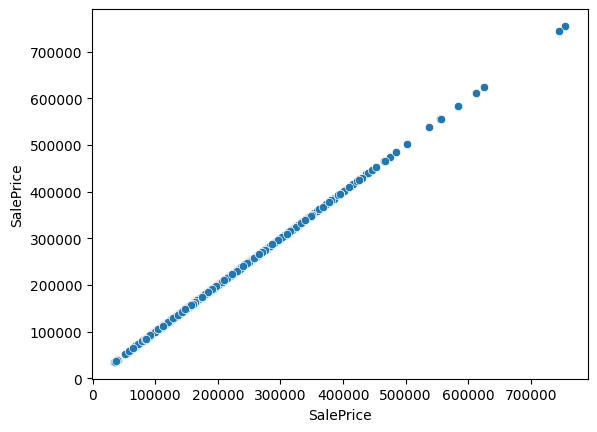

In [17]:
for col in numeric_columns:
    plt.figure()
    sns.scatterplot(x = col,y = 'SalePrice', data = train)

In [18]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [19]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']


In [20]:
train['houseremodelage'] = train['YrSold'] - train['YearRemodAdd']
test['houseremodelage'] = test['YrSold'] - test['YearRemodAdd']

In [21]:
train['totalsquarefeet'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2']
test['totalsquarefeet'] = test['1stFlrSF'] + test['2ndFlrSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2']

In [22]:
train['totalarea'] = train['GrLivArea'] + train['TotalBsmtSF']
test['totalarea'] = test['GrLivArea'] + test['TotalBsmtSF']

In [23]:
train['totalbath'] = train['BsmtFullBath'] + train['FullBath'] + 0.5*(train['BsmtHalfBath'] + train['HalfBath'])
test['totalbath'] = test['BsmtFullBath'] + test['FullBath'] + 0.5*(test['BsmtHalfBath'] + test['HalfBath'])


In [24]:
train_cleaned_1 = train.dropna(subset=['Id','YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'],axis = 0)

In [25]:
test_cleaned_1 = test.dropna(subset=['Id','YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'],axis = 0)

<Axes: >

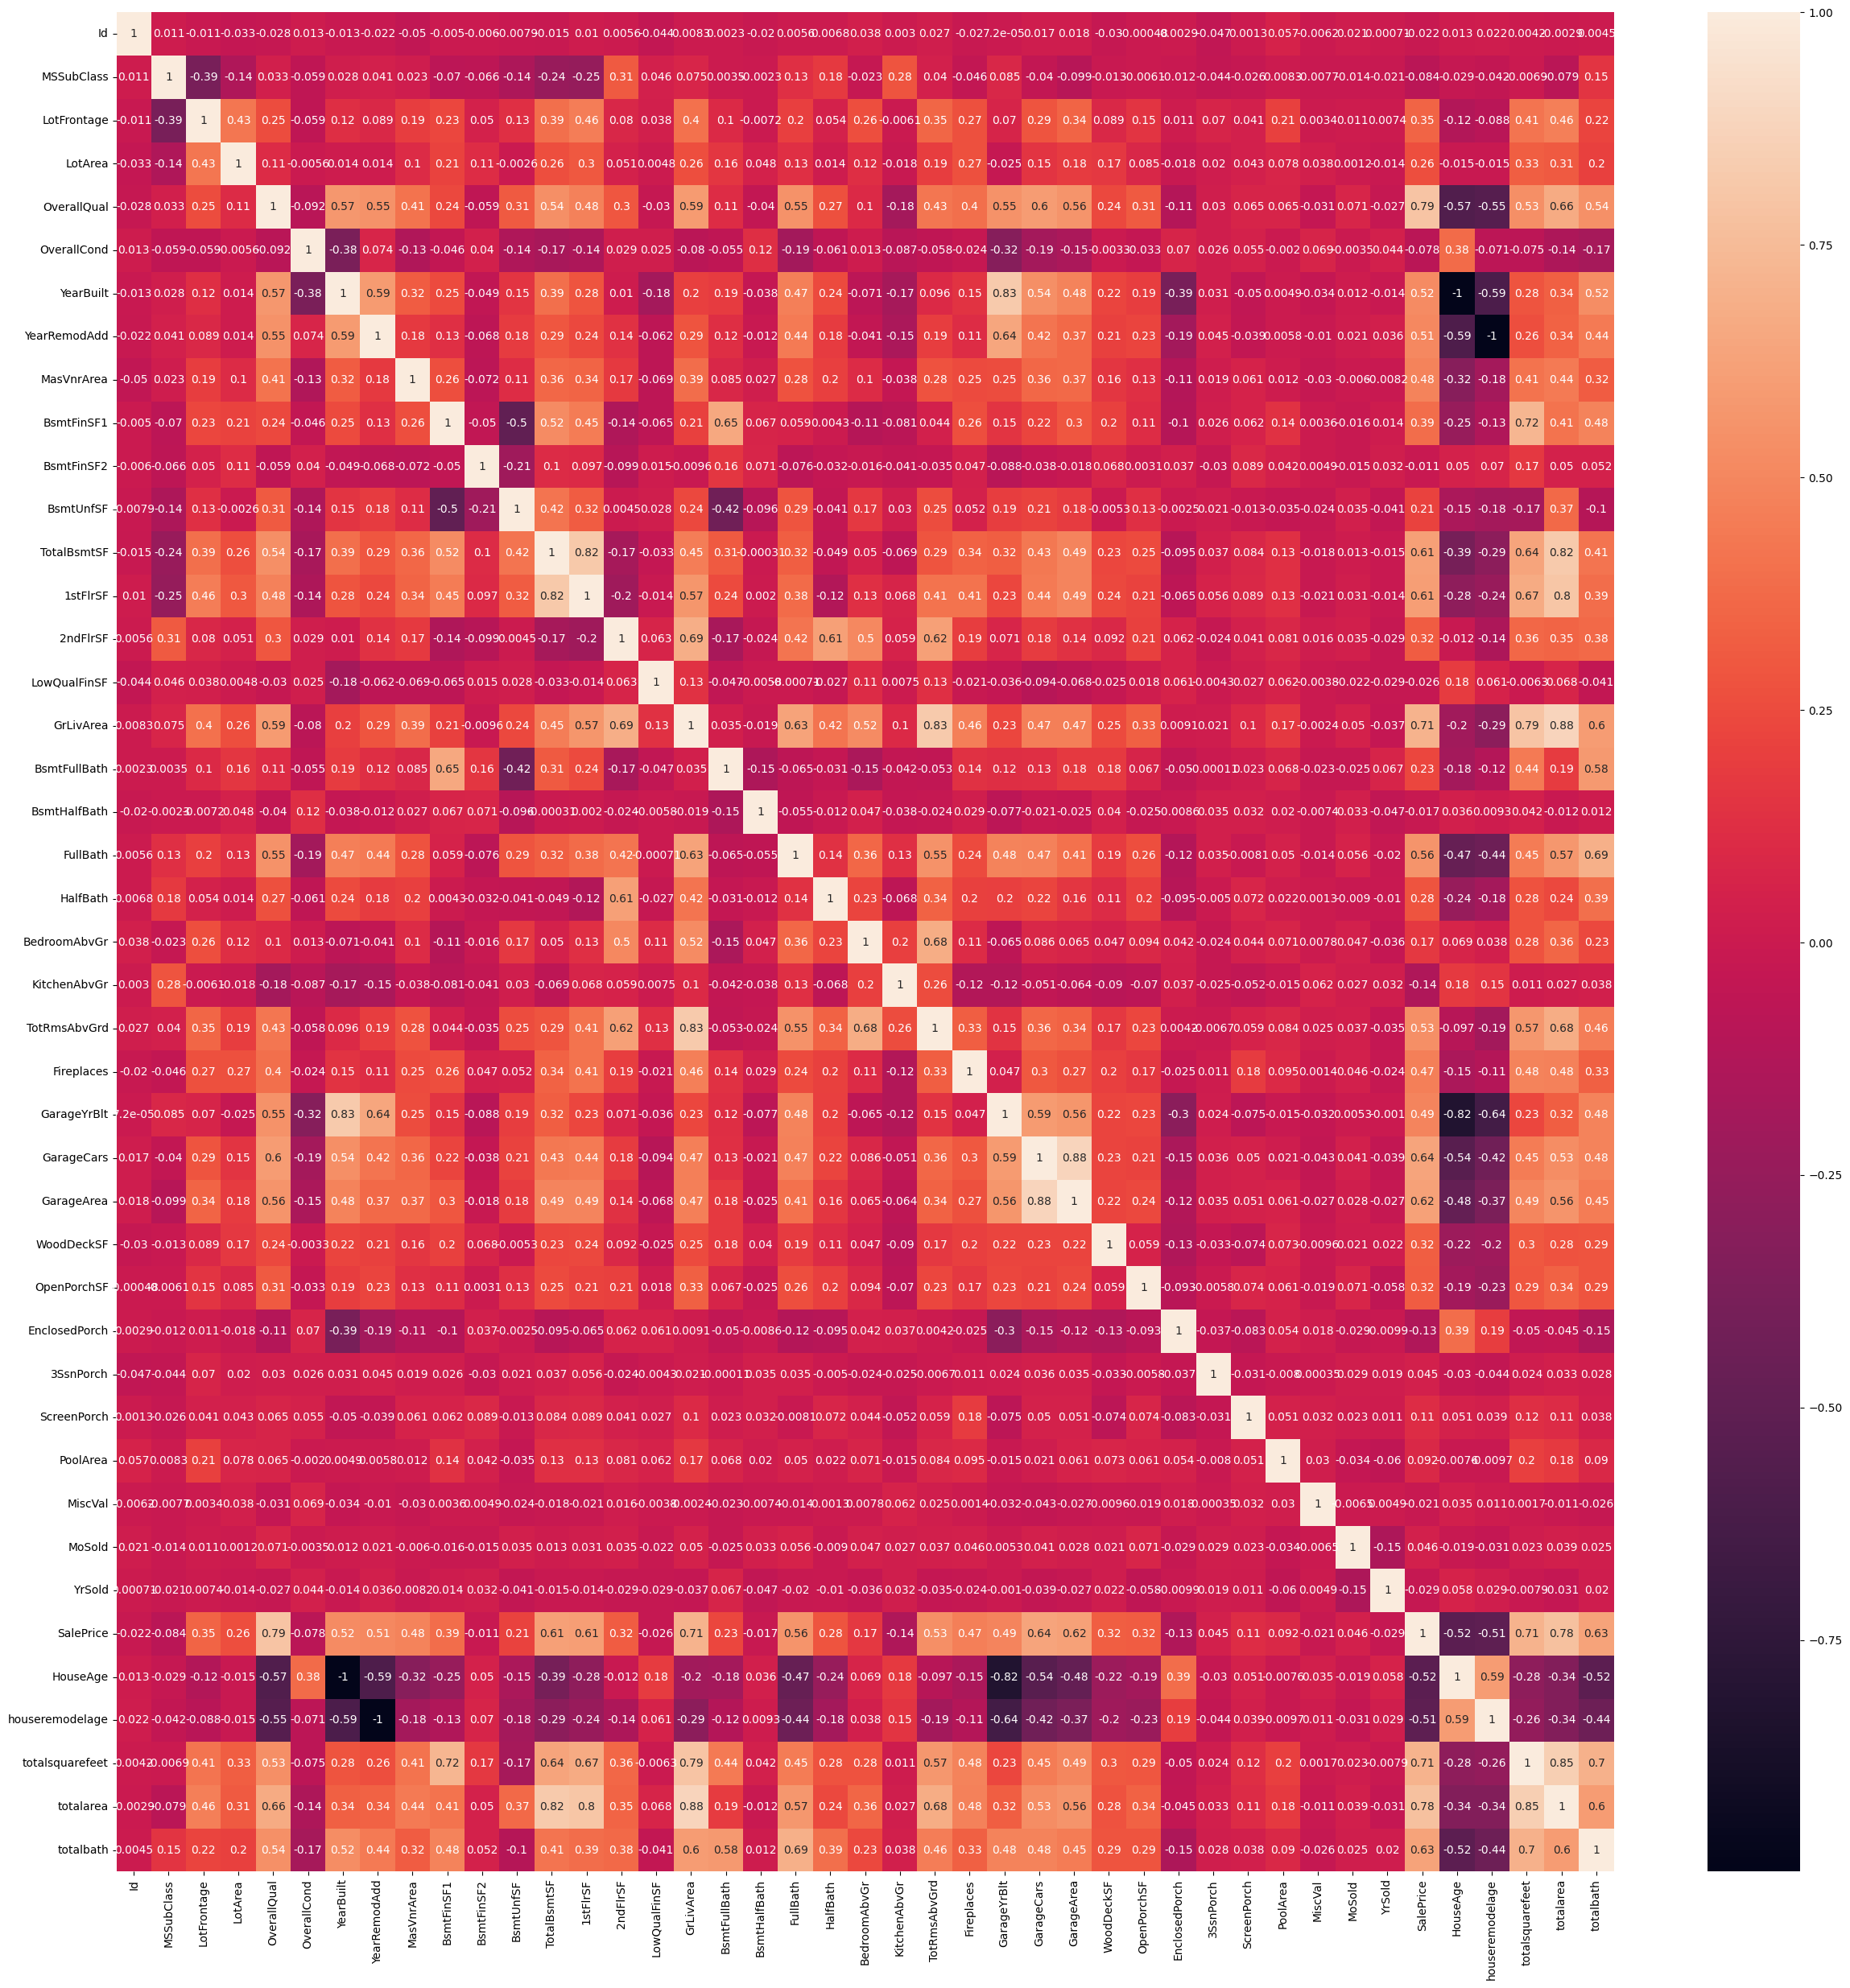

In [26]:
corr_matrix = train_cleaned_1.corr(numeric_only = True)
plt.figure(figsize = (30, 30))
sns.heatmap(corr_matrix,annot = True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

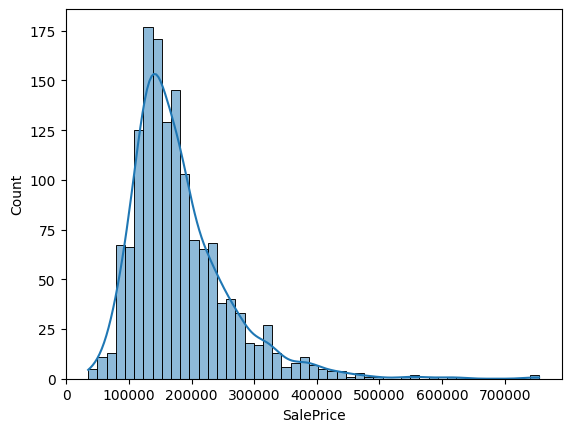

In [27]:
sns.histplot(train_cleaned_1 , x = train_cleaned_1['SalePrice'],kde = True)

In [28]:
num_columns = train_cleaned_1.select_dtypes(include=["int64", "float64"])
cat_columns = train_cleaned_1.select_dtypes(include=["object"])

correlation = num_columns.corr()["SalePrice"]

high_corr_features = correlation[correlation.abs() > 0.5].index.tolist()

high_corr_features.remove("SalePrice")

train_cleaned_1 = train_cleaned_1[high_corr_features + ["SalePrice"]]

In [29]:
train_cleaned_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OverallQual      1460 non-null   int64  
 1   YearBuilt        1460 non-null   int64  
 2   YearRemodAdd     1460 non-null   int64  
 3   TotalBsmtSF      1460 non-null   int64  
 4   1stFlrSF         1460 non-null   int64  
 5   GrLivArea        1460 non-null   int64  
 6   FullBath         1460 non-null   int64  
 7   TotRmsAbvGrd     1460 non-null   int64  
 8   GarageCars       1460 non-null   int64  
 9   GarageArea       1460 non-null   int64  
 10  HouseAge         1460 non-null   int64  
 11  houseremodelage  1460 non-null   int64  
 12  totalsquarefeet  1460 non-null   int64  
 13  totalarea        1460 non-null   int64  
 14  totalbath        1460 non-null   float64
 15  SalePrice        1460 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 182.6 KB


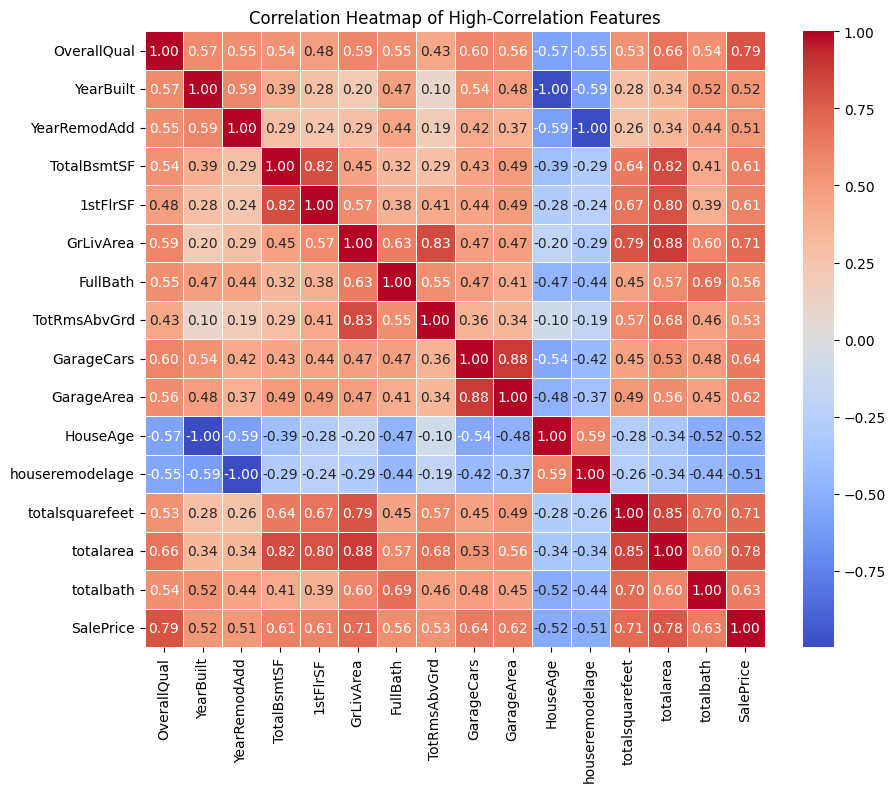

In [30]:
corr_matrix = train_cleaned_1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of High-Correlation Features")
plt.show()


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_cleaned_1[high_corr_features] = scaler.fit_transform(train_cleaned_1[high_corr_features])

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

X = train_cleaned_1.drop(columns=["SalePrice"])
y = train_cleaned_1["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Use mean_squared_error or r2_score for regression evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 846194819.9375
R-squared: 0.8897
